In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import warnings
warnings.filterwarnings('ignore')

In [9]:
products = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Product_info.csv')
account = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Account_info.csv')
sales = pd.read_csv(r'C:\Users\HP\Desktop\PORTO BUSINESS SCHOOL\DESCRIPTIVE ANALYTICS\PROJECT\Data\Sales_info.csv')

In [13]:
print(type(products))
products

<class 'pandas.core.frame.DataFrame'>


,encrypt_sku,product_dsc,sub_cat_cd,subcat_dsc_ext,catg_cd,cat_dsc_ext,department_cd,department_dsc_ext,brand_cd,brand_dsc,capacity_unit,conversion_factor
0,23121635,DET LÍQ MÁQ ROUPA OMO 96D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,96.00
1,23226017,DET LÍQ MÁQ ROUPA OMO 55D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,55.00
2,15751913,DET MAN PÓ ROUPA OMO 540GR,10104,det. manual roupa,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,KG,0.54
3,22159862,TOALHITAS PROTEÇÃO COR CONTINENTE 20UN,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,9798,CONTINENTE,UN,20.00
4,22765574,(I)DESINFE LIQUIDO ROUPACNT PRO 500ML,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,38313,CONT.PROTECT,LT,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2906,23992205,MASSA PANZANI MACH EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2907,23992193,MASSA PANZANI SPAG EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2908,23992199,MASSA PANZANI FARFALLE 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2909,23959868,PASTA BERRUTO ARRIGHI CONCHIGLIO 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,41369,BERRUTO,UN,1.00


In [15]:
print(type(account))
account

<class 'pandas.core.frame.DataFrame'>


,account_no,family_members,segment_gender_f,segment_gender_m,age_group,district,region,segment_cd_lifestyle,segment_dsc_lifestyle,segment_cd_lifestage,segment_dsc_lifestage
0,839904903518,5,0,0,>=65 anos,braga,litoral norte,1,Os Saudáveis Exigentes,2,Senior
1,839915544120,3,0,0,55-65 anos,braga,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
2,839958948398,4,0,0,35-45 anos,aveiro,litoral norte,3,Os Pais Práticos,4,Family With Kids
3,839960123646,17,0,0,45-55 anos,porto,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
4,839991834603,1,0,0,55-65 anos,NaN,NaN,7,Os Promocionais Atentos,3,Family With Young Adults
...,...,...,...,...,...,...,...,...,...,...,...
3108,840267515632,3,0,0,35-45 anos,setúbal,litoral sul,7,Os Promocionais Atentos,5,Active Adults
3109,840271411371,2,0,0,25-35 anos,aveiro,litoral norte,6,Os Económicos Focados,5,Active Adults
3110,840297031294,2,0,0,35-45 anos,ilha da madeira,litoral sul,1,Os Saudáveis Exigentes,5,Active Adults
3111,840297937268,1,0,0,18-25 anos,setúbal,litoral sul,2,Os Urbanos Sofisticados,3,Family With Young Adults


In [16]:
print(type(sales))
sales

<class 'pandas.core.frame.DataFrame'>


,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.000,0.89,1.09,0.0,0.10,0.00
1,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,15244838,4.000,1.63,2.00,2.0,3.15,0.00
2,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,22020944,1.000,1.94,2.39,0.8,3.15,0.00
3,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,6071048,1.000,0.82,0.87,0.0,11.26,0.09
4,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,20167550,1.000,5.36,6.59,4.4,11.26,0.66
...,...,...,...,...,...,...,...,...,...,...,...
148115,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,21862649,1.000,1.13,1.39,0.0,7.80,0.00
148116,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,19242485,1.000,0.97,1.19,0.0,7.80,0.00
148117,840019224482,2fL94Vy/w4uWWJJXhYwg+XmWdbokEpLEOyb439p7nLxnij...,20240922,P,20670689,1.000,1.27,1.35,0.0,0.20,0.00
148118,839967948997,51X+G6JcrvmpQNgT+H6UJ+4Ms1nqOr2LUsFmuwmfCPiQT5...,20241023,P,24000260,1.000,2.68,3.30,0.0,2.73,0.52


In [10]:
#Encrypted SKU & Product Name
sales_merged = sales.merge(products [['encrypt_sku','product_dsc']], on='encrypt_sku', how='left')
sales_merged.head(1)

,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt,product_dsc
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.0,0.89,1.09,0.0,0.1,0.0,(I)NACHOS COM SAL CONTINENTE 150G


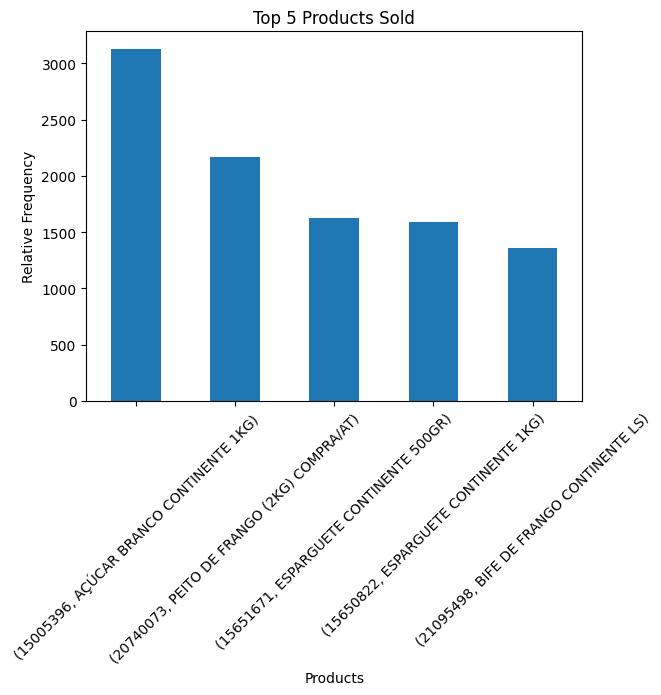

In [11]:
#Check the frequency of each product on the sales data
products_frequency = sales_merged[['encrypt_sku','product_dsc']].value_counts()
products_frequency

#Top 5 products sold
top_5_products = products_frequency.head(5)
top_5_products.plot (kind ='bar')
plt.title('Top 5 Products Sold')
plt.ylabel('Relative Frequency')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.show()

In [35]:
#Caracterization of the Transactions
transaction_sizes = sales_merged.groupby('transaction_id')['product_dsc'].count()
transaction_sizes.describe()

count    58593.000000
mean         2.527947
std          2.192949
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: product_dsc, dtype: float64

In [36]:
# Products that appear in, at least, 10% of the transactions
products_transaction_frequency = products_frequency [products_frequency >= len('transaction_id') * 0.1]
print(f"Number of items with support ≥ 0.1: {len(products_transaction_frequency)}")


Number of items with support ≥ 0.1: 2549


In [37]:
# Encode the Transactions
transactions = sales_merged.groupby('transaction_id')['product_dsc'].apply(list).tolist()
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)
encoded_sales.head(1)


,(AÇ) FRANGO INTEIRO C/ MIÚDOS,(AÇ) FRANGO S/MIUDOS CONG COPRAVE KG PM,(AÇ) NOVILHO ACÉM COMPRIDO CFA,(AÇ) NOVILHO BIFE DO REDONDO CFA,(AÇ) NOVILHO BIFE POJADOURO ANGUS AT KG,(AÇ) NOVILHO ESCALOPES CFA,(AÇ) NOVILHO FIGADO FRESCO CFA KG,(AÇ) NOVILHO JARDINEIRA 2ª CFA LS,(AÇ) NOVILHO MEDALHÕES CFA LS,(AÇ) NOVILHO OSSO BUCKO CFA LS,...,XILITOL BIO SEARA 250G SEARA 250G,ZERO BAR 40 G - CARAM PROZIS BX TEOR DE,ZERO BAR LOW SUGARS FUDGE PROZIS 40G,ZINCO SUPLA 40CPS,ZITI TAGLIATI DIVELLA 500GR,ZITONI RAGLIATI DIVELLA 500GR,ZMA ÉVOLUTION 60 CAPS EU NUTRITION,"\EXTRA \""\""BARRIGUINHA\""\"" 30CP\""""",ÁGUA P/FERRO PERFUMADA CONTINENTE 1LT,ÁGUA PERF P/FERRO COMFORT VAPORESSE 1L
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Run Apriori to Get Frequent Co-Purchased Products (0,5% of the transactions)
min_supp = 0.005
freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True) 
print(f"Number of Frequent Co-Purchased Products: {len(freq_copurchased)}")

Number of Frequent Co-Purchased Products: 106


In [39]:
freq_copurchased.sort_values(by= "support",ascending=False)

,support,itemsets
16,0.053368,(AÇÚCAR BRANCO CONTINENTE 1KG)
85,0.036967,(PEITO DE FRANGO (2KG) COMPRA/AT)
59,0.028928,(ESPARGUETE CONTINENTE 500GR)
58,0.027085,(ESPARGUETE CONTINENTE 1KG)
36,0.023245,(BIFE DE FRANGO CONTINENTE LS)
...,...,...
49,0.005052,(CERV. C/ALC. TP GUTBIER 1L)
74,0.005035,(MACEDONIA CONTINENTE 1 KG)
19,0.005018,(BAT. FR. OND. SOUR CREAM E CEB. CNT 150G)
10,0.005018,(ARROZ CAROLINO CAÇAROLA 1KG)


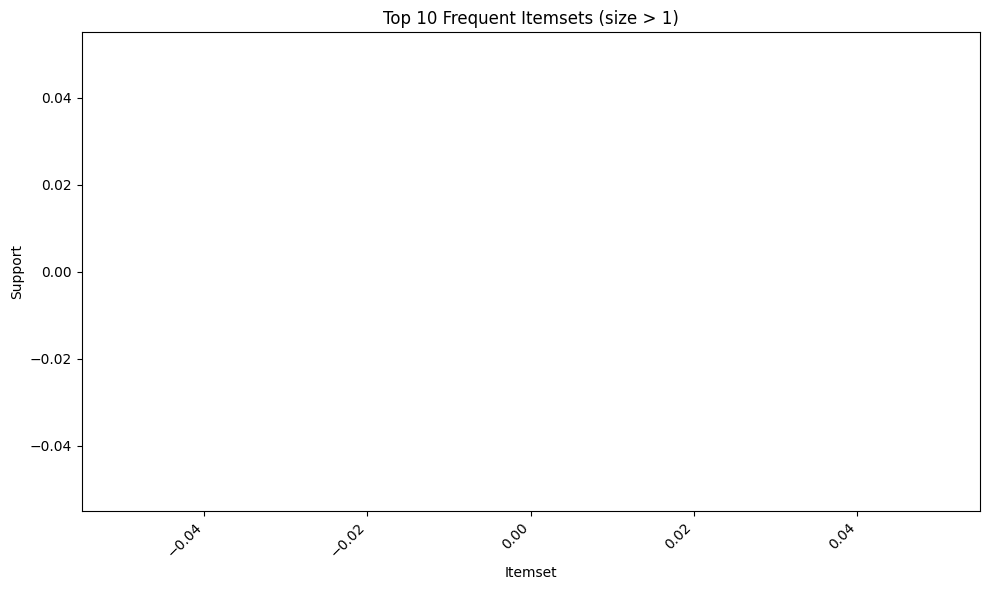

In [41]:
# Filter itemsets with more than 1 product
freq_copurchased['length'] = freq_copurchased['itemsets'].apply(lambda x: len(x))
filtered = freq_copurchased[freq_copurchased['length'] > 1]

# Get top 10 by support
top10 = filtered.sort_values(by='support', ascending=False).head(10)

# Convert sets to strings for labeling
top10['itemset_str'] = top10['itemsets'].apply(lambda x: ', '.join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.bar(top10['itemset_str'], top10['support'])
plt.title("Top 10 Frequent Itemsets (size > 1)")
plt.xlabel("Itemset")
plt.ylabel("Support")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
#Generate association rules from frequent itemsets
min_conf=0.1
rules = association_rules(freq_copurchased, metric="confidence", min_threshold=min_conf,num_itemsets=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
